In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

На картинке изображена структурная схема модели, которую планируется реализовать.

Желтым цветом отмечены блоки, функции для которых на данный момент прописаны.

Синим цветом отмечены блоки, над которыми либо ведется работа, либо они просто пропущены (тк не написан другой блок, без которого этот не может обойтись), но будут в финальной модели.

Красным цветом отмечены блоки, которые делать не планируется.

![Структурная схема модели](model_structure.png)

Каждый блок этой диаграммы (или набор блоков) реализован как отдельная функция, преобразующая входной в нее массив.

Основной управляющий файл `ofdm_modem.m` сохраняет данные с выхода каждого блока в txt файл. Поэтому можно смотреть как преобразуется сигнал от блока к блоку.

### Созвездие модулятора и отсчеты принятого сигнала в частотной области

In [16]:
info_frame = pd.read_csv('model_290324_CP_ber_evm\\info_frame.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])
info_frame_fd = pd.read_csv('model_290324_CP_ber_evm\\info_frame_fd.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])
metrics = pd.read_csv('model_290324_CP_ber_evm\\metrics.txt', sep=',', index_col=False, header=None, names=['value'])

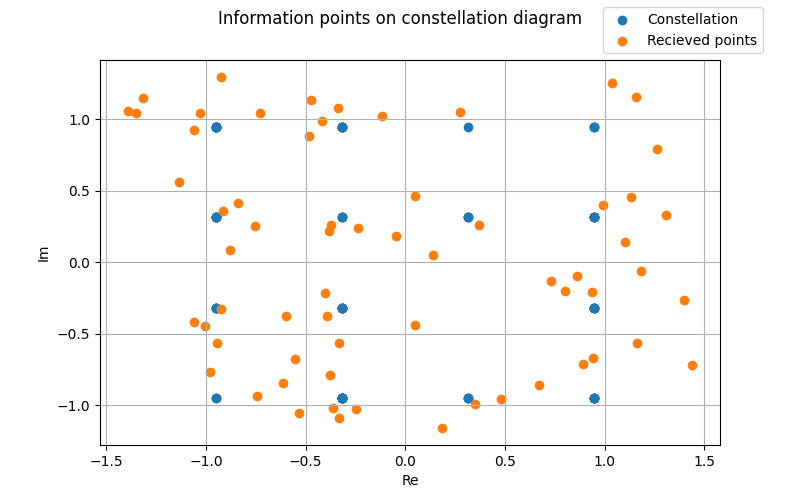

In [17]:
fig1 = plt.figure(figsize=(8,5))
ax_1 = fig1.add_subplot(111)
ax_1.scatter(info_frame['Re'], info_frame['Im'], label='Constellation')
ax_1.scatter(info_frame_fd['Re'], info_frame_fd['Im'], label='Recieved points')
ax_1.set_ylabel("Im")
ax_1.set_xlabel(r"Re")
ax_1.legend(bbox_to_anchor=(0.8, 1))
ax_1.grid()
#ax_1.set_title('Real part')
fig1.suptitle('Information points on constellation diagram')
plt.show()

### Фрейм во временной области и добавление циклического префикса

In [18]:
info_frame_td = pd.read_csv('model_290324_CP_ber_evm\\info_frame_td.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])

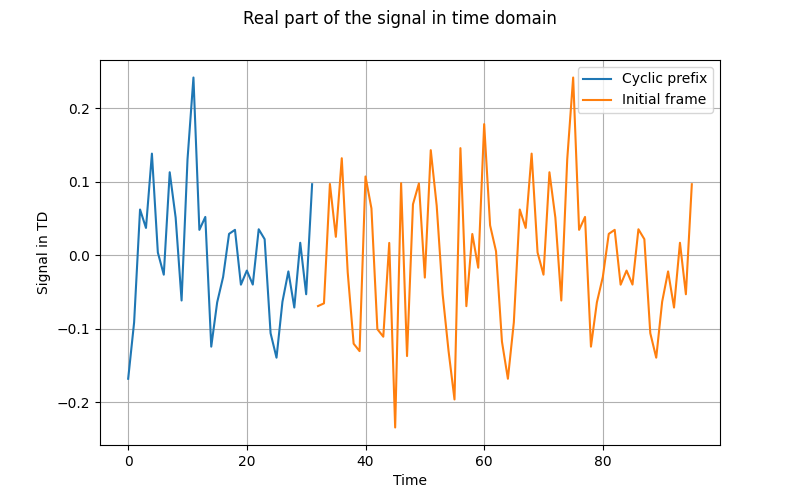

In [19]:
cp_size = int(len(info_frame_td['Re'])/3)

fig2 = plt.figure(figsize=(8,5))
ax_1 = fig2.add_subplot(111)
ax_1.plot(info_frame_td.index[:cp_size], info_frame_td['Re'][:cp_size], label='Cyclic prefix')
ax_1.plot(info_frame_td.index[cp_size:], info_frame_td['Re'][cp_size:], label='Initial frame')
ax_1.set_ylabel("Signal in TD")
ax_1.set_xlabel(r"Time")
ax_1.legend()
ax_1.grid()
#ax_1.set_title('Real part')
fig2.suptitle('Real part of the signal in time domain')
plt.show()

### Пилотный сигнал и его спектр

In [20]:
pilots_frame = pd.read_csv('model_290324_CP_ber_evm\\pilots_frame.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])
pilots_frame_td = pd.read_csv('model_290324_CP_ber_evm\\pilots_frame_td.txt', sep=',', index_col=False, header=None, names=['Re', 'Im'])

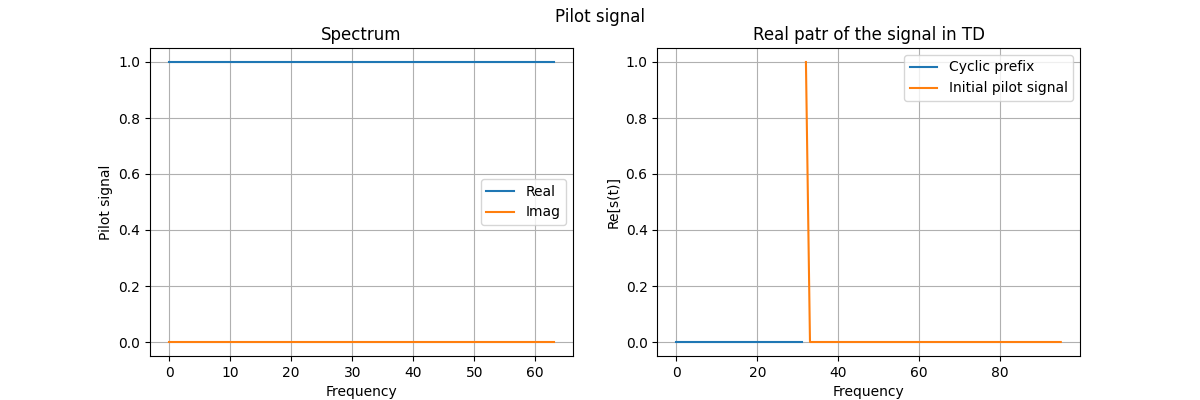

In [21]:
fig3 = plt.figure(figsize=(12,4))
ax_1 = fig3.add_subplot(121)
ax_1.plot(pilots_frame.index, pilots_frame['Re'], label='Real')
ax_1.plot(pilots_frame.index, pilots_frame['Im'], label='Imag')
ax_1.set_ylabel("Pilot signal")
ax_1.set_xlabel(r"Frequency")
ax_1.legend()
ax_1.grid()
ax_1.set_title('Spectrum')
fig3.suptitle('Pilot signal')

ax_2 = fig3.add_subplot(122)
ax_2.plot(pilots_frame_td.index[:cp_size], pilots_frame_td['Re'][:cp_size], label='Cyclic prefix')
ax_2.plot(pilots_frame_td.index[cp_size:], pilots_frame_td['Re'][cp_size:], label='Initial pilot signal')
ax_2.set_ylabel("Re[s(t)]")
ax_2.set_xlabel(r"Time")
ax_2.legend()
ax_2.grid()
ax_2.set_title('Real part of the signal in TD')
plt.show()